# Scipy Method

In [16]:
# Load Modules
import numpy as np
from scipy.optimize import curve_fit
%matplotlib inline  
import matplotlib.pyplot as plt

In [34]:
# Define function to be used
def T2decay(xdata, T1,Mz):
    R1=1.0/T1
    return Mz * np.exp(-xdata*R1)

def plot(xdata,ydata1,ydata2):
    plt.plot(xdata,ydata1)
    plt.scatter(xdata,ydata2,color='r')
    plt.show()

In [10]:
# Simulate data
NPoints=20
TR=np.linspace(0,0.2,NPoints)
T2=.050
Mz=1.0
Signal=T2decay(TR, T2,Mz)

In [11]:
# Add Gaussian noise
mu=0.0; sigma=0.1;
Signal_with_noise= Signal + np.random.normal(mu, sigma, NPoints)

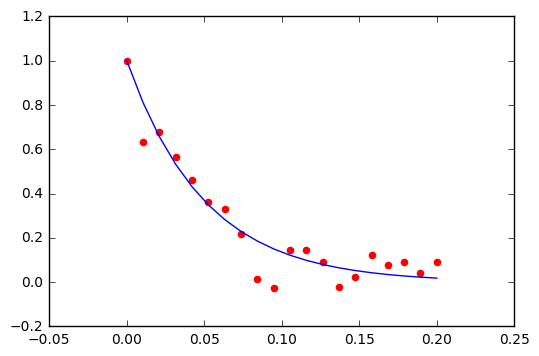

In [36]:
# Plot
plot(TR,Signal,Signal_with_noise)

In [38]:
# Perform Non-Linear curve fitting with bounds
# using SciPy
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
initial_guess=[1,.1]
pars_hat, cov = curve_fit(T2decay, TR, Signal_with_noise,p0=initial_guess,bounds=(0, 1.0))

In [39]:
# estimate Yhat
Yhat = T2decay(TR, pars_hat[0],pars_hat[1])

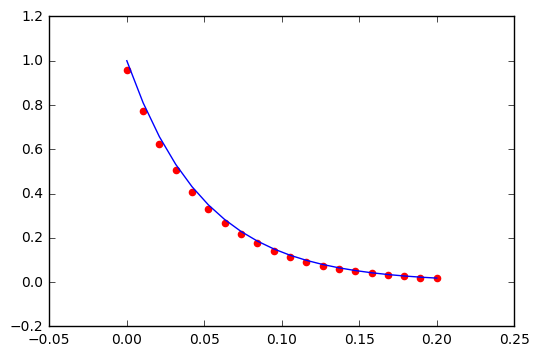

In [40]:
# Plot estimated data
plot(TR,Signal,Yhat)

# LMFIT Method